<a href="https://colab.research.google.com/github/yahal2005/Image-Classification-for-Cats-and-Dogs/blob/main/image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from PIL import Image

In [3]:
def load_images_from_folder(folder,label,image_size=(64,64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img = Image.open(os.path.join(folder, filename))
        img = img.resize(image_size)
        img_array = np.array(img).flatten()
        images.append(img_array)
        labels.append(label)
    return images, labels

In [6]:
cat_images, cat_labels = load_images_from_folder('/content/data/cat', 0)
dog_images, dog_labels = load_images_from_folder('/content/data/dog', 1)

x = np.array(cat_images + dog_images)
y = np.array(cat_labels + dog_labels)

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [8]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [9]:
from sklearn.metrics import confusion_matrix, classification_report
y_pred = knn.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred, target_names=["Cat","Dog"])
print("Classification Report:")
print(class_report)

Test Accuracy: 58.75%
Confusion Matrix:
[[28 16]
 [17 19]]
Classification Report:
              precision    recall  f1-score   support

         Cat       0.62      0.64      0.63        44
         Dog       0.54      0.53      0.54        36

    accuracy                           0.59        80
   macro avg       0.58      0.58      0.58        80
weighted avg       0.59      0.59      0.59        80



In [10]:
def preprocess_image(image_path, image_size=(64, 64)):
    img = Image.open(image_path)
    img = img.resize(image_size)
    img_array = np.array(img).flatten()
    return img_array.reshape(1,-1)

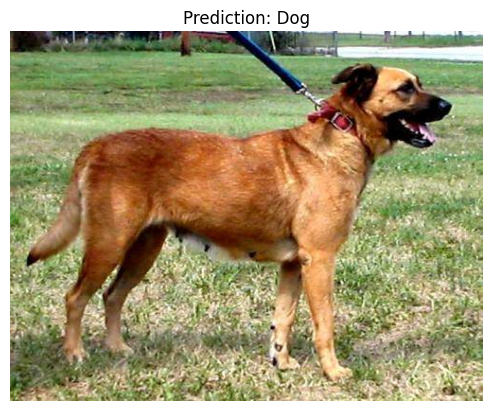

In [11]:
import matplotlib.pyplot as plt

def display_image_with_label(image_path, label):
    img = Image.open(image_path)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {'Cat' if label == 0 else 'Dog'}")
    plt.show()
new_image_path = '/content/testt/dog.318.jpg'
new_image = preprocess_image(new_image_path)
prediction= knn.predict(new_image)[0]
display_image_with_label(new_image_path, prediction)